In [53]:
import numpy as np
from numpy.linalg import inv, qr
import random
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, KFold,cross_val_score

In [4]:
data = np.array(
    [
        [1,5],
        [2,7],
        [3,7],
        [4,10],
        [5,11],
        [6,14],
        [7,17],
        [8,19],
        [9,22],
        [10,28],
    ]
)


In [6]:
# Градиентный спуск - пакетный градиентый спуск. Для работы используются ВСЕ доступные обучающие данные

In [8]:
# Стохастический градиентный спуск, на каждой итерации обучаемся только по одной выборке из данных
# - сокращение числа вычислений
# - вносим смещение => боремся с переобучением
# - МИни-пакетный градиентый спуск , на каждой итерации используется несколько выборок 

In [16]:

x = data[:, 0]
y = data[:, 1]

n = len(x)

w1 = 0.0
w0=0.0

L = 0.001
#Размер выборки
sample_size = 2

iterations = 100_000
for i in range(iterations):
    idx = np.random.choice(n, sample_size, replace = False)
    D_w0 = 2* sum( -y[idx] + w0 + w1 * x[idx])
    D_w1 = 2 * sum(x[idx] * (-y[idx] + w0 + w1 * x[idx]))
    w1 -= L * D_w1
    w0 -= L*D_w0

print(w1, w0)

2.2895872641967836 0.8459364205981263


In [18]:
# Как оценить на сколько сильно промахиваются прогнозы при использовании линейной регрессии
# 

In [24]:
data = np.array(
    [
        [1,5],
        [2,7],
        [3,7],
        [4,10],
        [5,11],
        [6,14],
        [7,17],
        [8,19],
        [9,22],
        [10,28],
    ]
)
data_df = pd.DataFrame(data)
print(data_df.corr(method = "pearson"))

         0        1
0  1.00000  0.97684
1  0.97684  1.00000


In [28]:
data_df[1] = (data_df[1].values[::-1])
print (data_df.corr(method="pearson"))

         0        1
0  1.00000 -0.97684
1 -0.97684  1.00000


In [30]:
# Коэффициент корреляции помогает понять, есть ли связь между двумя переменными

In [32]:
# Обучающие и тестовые выборки 
# Основной метод борьбы с переобучением, заключается в том, что набор данных делится на обучающую и тестовую выборки.abs

# Во всех видах машинного обучения с учителем это встречается

# обычная пропорция 2/3 - на обучение, 1\3 - на тест (4\5 к 1\5, 9\10 к 1\10)

In [47]:
data = np.array(
    [
        [1,5],
        [2,7],
        [3,7],
        [4,10],
        [5,11],
        [6,14],
        [7,17],
        [8,19],
        [9,22],
        [10,28],
    ]
)
data_df = pd.DataFrame(data)

X = data_df.values[:,:-1]
Y = data_df.values[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[ 9]
 [ 5]
 [ 6]
 [ 4]
 [ 8]
 [10]]
[22 11 14 10 19 28]
[[7]
 [3]
 [1]
 [2]]
[17  7  5  7]


In [49]:
model = LinearRegression()
model.fit(X_train, Y_train)

r = model.score(X_test, Y_test)
print(r)

0.5005974927849919


In [57]:
kfold = KFold(n_splits=3, random_state =1, shuffle=True) # 3-х кратная перекрестная валидация
model = LinearRegression()

result =  cross_val_score(model, X, Y, cv=kfold)
print(result) # средне квадратические ошибки для всех 3-х моделей
print(result.mean(), result.std())

[ 0.88414769 -2.35154626  0.75792214]
-0.23649214168138835 1.4964566263570558


In [59]:
# Метрики показывают насколько ЕДИНООБРАЗНО ведет себя модель на разных выборках
# Возможно использование поэлементной перекрестной валидации - мало данных
# Случайная валидация 

In [61]:
# Валидационная выборка - для сравнения различных моделей или конфигураций 

In [63]:
# Многомерная линейная регрессия 

In [65]:
data_df = pd.read_csv('multiple_independent_variable_linear.csv')

In [67]:
print(data_df.head())

   x1  x2   y
0   0  22  88
1   1  13  62
2   1  15  67
3   1  14  62
4   2  18  77


In [73]:
X = data_df.values[:, :-1]
Y = data_df.values[:, -1]

model = LinearRegression().fit(X,Y)
print(model.coef_, model.intercept_)

[2.00672647 3.00203798] 20.109432820035977


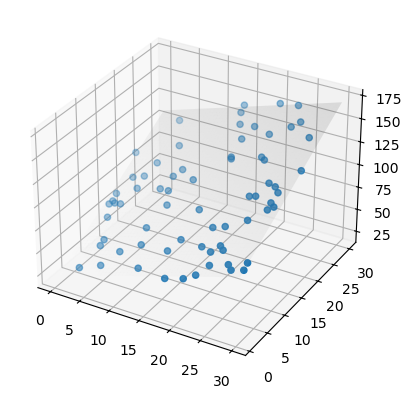

In [81]:
x1 = X[:,0]
x2=X[:,1]
y = Y

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(x1, x2, y)

x1_ = np.linspace(min(x1), max(x1), 100)
x2_ = np.linspace(min(x2), max(x2), 100)

X1_, X2_ = np.meshgrid(x1_, x2_)

Y_ = model.intercept_ + model.coef_[0]*X1_ + model.coef_[1]*X2_

ax.plot_surface(X1_, X2_, Y_, cmap="Greys", alpha=0.1)

plt.show()